### mecab 설치(까다로움;;)

In [ ]:
pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!git clone https://bitbucket.org/eunjeon/mecab-python-0.996.git

Cloning into 'mecab-python-0.996'...
Unpacking objects: 100% (17/17), 59.65 KiB | 1.86 MiB/s, done.


In [ ]:
cd mecab-python-0.996/

/content/mecab-python-0.996


In [ ]:
!pip install mecab-python3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.6/581.6 kB 33.8 MB/s eta 0:00:00


In [ ]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 55.3 MB/s eta 0:00:00


In [ ]:
!apt-get update
!apt-get install g++ openjdk-8-jdk
!pip3 install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

# 여기까지 돌리고 '런타임 다시 시작' 누르기

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:7 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:9 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1,058 kB]
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:11 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:12 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [2,489 kB]
Get:14 htt

In [ ]:
from konlpy.tag import Mecab

mecab = Mecab()
print(mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는 게 나을 뻔'))

['와', '이런', '것', '도', '상품', '이', '라고', '차라리', '내', '가', '만드', '는', '게', '나을', '뻔']


### 시작

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Read Excel file from Google Drive
# 첫번째 레코드가 제외되어서 skip 옵션을 없앴어요

train_data = pd.read_excel('/content/drive/MyDrive/mj_sentiment_train.xlsx')
test_data = pd.read_excel('/content/drive/MyDrive/mj_sentiment_test.xlsx')
print('train_data 전체 리뷰 개수 :',len(train_data)) # 전체 리뷰 개수 출력
print('test_data 전체 리뷰 개수 :',len(test_data)) # 전체 리뷰 개수 출력

train_data 전체 리뷰 개수 : 120000
test_data 전체 리뷰 개수 : 40000


In [ ]:
train_data

,Unnamed: 0,comment,real_label
0,0,오 멋진분이네요 굿굿,1
1,1,누구말이 맞나요 어딘 좀큰 아이 라고하고 그 부모가 관리안했다고하고 여긴 욕하는사람...,0
2,2,와 감동안습,1
3,3,저런럼들은 끌어내 본보기로 고대중국식태형으로다스려야,0
4,4,진짜 저 아기가 운좋게 생명의 은인들을 만났네요 분뒤를 예측할 수도 없을만큼 위험한...,1
...,...,...,...
165949,165949,에고 경찰은 뭐하녀,0
165950,165950,만 으로 버는돈이면 햄버거 저 금액 돈도 아닐텐데 머리카락 수작을 부리고있어 대단하다,0
165951,165951,허 피해자 어르신 사고난 부근 돌려서 역추적 하면 찾을수 있을텐데 최대한 근처가서 ...,0
165952,165952,대한민국의 미래 카이스트,0


In [ ]:
test_data

,Unnamed: 0,comment,real_label
0,0,술상자를 실었으면 밧줄로 묵어 안 솟아지도록 철저히해서 운전해야지 딱보니 소주박스 ...,0
1,1,아므리 그래도 그간 안됨 선행과 국적취득을 연결하면 안되지,0
2,2,맞는말임 회항하면 패널티땜에 비상착륙 예상,0
3,3,누가 면허 줬니,0
4,4,에휴 요즘 한국계집들은 왜 이모양인지 법이 너무 계집한테 유리해서 그렇다 쯧쯧,0
...,...,...,...
55314,55314,와 분만에 저렇게 타네,0
55315,55315,저분은 딸배라고 부를수없다,0
55316,55316,누구 주머니로 다 들어갔을까,0
55317,55317,이래노쿠 안전한 한국이라고 떠들어댈텐가 아니지 범죄자들에게 안전한국가란 말인가,0


In [ ]:
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 165954
테스트용 리뷰의 개수 : 55319


<Axes: >

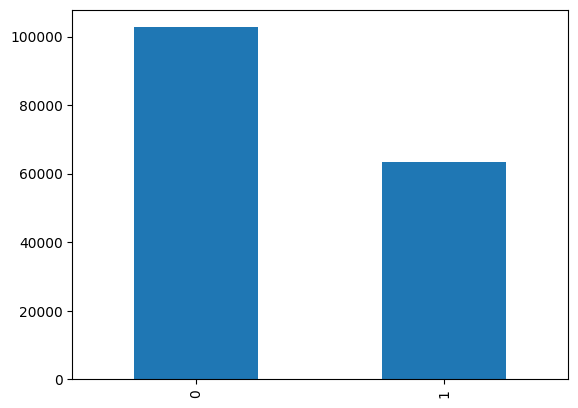

In [ ]:
#런타임이 너무 오래 걸려서 굳이 실행하지 않기로 했습니다
train_data['real_label'].value_counts().plot(kind = 'bar')

In [ ]:
print(train_data.groupby('real_label').size().reset_index(name = 'count'))

   real_label   count
0           0  102656
1           1   63298


In [ ]:
print(test_data.groupby('real_label').size().reset_index(name = 'count'))

   real_label  count
0           0  34483
1           1  20836


### 4. 데이터 정제하기

In [ ]:
train_data.drop_duplicates(subset = ['comment'], inplace=True) # 중복 제거
train_data['comment'] = train_data['comment'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행

train_data['comment'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
train_data = train_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(train_data))

전처리 후 테스트용 샘플의 개수 : 120000


<ipython-input-5-6a2d87ce2bc2>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['comment'] = train_data['comment'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행


In [ ]:
test_data.drop_duplicates(subset = ['comment'], inplace=True) # 중복 제거
test_data['comment'] = test_data['comment'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행

test_data['comment'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 40000


<ipython-input-6-83b21a032efb>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['comment'] = test_data['comment'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행


In [ ]:
print(train_data['comment'])

0                                             형 딸도 문제가 많다던데
1                                냥이 차칸척 인분 추가요 온데 가르치고다니네 별
2         너무 물러터진 대한민국 법 술에는 엄청 관대한 나라 이러니 외국인들도 술먹고 사고치...
3                    한심한 공무원들 이네요 완전 무방비상태네요 국민들은 누굴 믿어야하는지
4         이걸 어떻게 보이스피싱으로 생각하고 신고를하지 신기하네요 저였으면 그런생각을 아예못...
                                ...                        
119995                           대한민국 만세 대단한 시민의식입니다 감동했습니다
119996                                             드디어 올라가넼
119997    나 눈물나와서 울었어요 마지막 할아버지 역주행으로 자전거 타고가시는데 자전거메모에 ...
119998    난 생존수영 배웠지만 년만에 다 까먹어버렸음 저아이는 진짜 대단하다 왠만한 어린아이...
119999                                              우오 짱멋있다
Name: comment, Length: 120000, dtype: object


In [ ]:
print(test_data['comment'])

0                                          저딴것들이 우리세금 냠냠하네
1        요즘 대학교 에타보면 저런 애들이 너무많아서 겁이남 학벌주의에 심취하는건 새내기때에...
2        자기 딸이 회사에서 밥 짓는다고 그러면 화낼 인간들이 직원에게는 저러고 있네 어휴 ...
3                            테이저건 쏘고 묶어놔야지 승무원들 처벌해라 뭐하는거야
4        네 사정이야 어찌되었든 과속하셨구요 공권력 사칭으로 간주 벌금 이빠이 되겠습니다 서...
                               ...                        
39995    저런데 한국이 중국을 도와줘야 되는가 절대 않되는거지 인권이 심각하다 북한이랑 다를...
39996    이런분들은 영웅이십니다 국민영웅들입니다 이런분들은 표창을 줘야합니다 그런분들 앞으로...
39997                                           정신병있네 똑똑한척
39998    훌륭한 젊은이 아직 대한민국은 그대와같은 젊은이가 있는한 최고가 될수있다 젊은 영웅...
39999                                             아들 잘 키웠다
Name: comment, Length: 40000, dtype: object


In [ ]:
# 정상 동작 확인
from konlpy.tag import Okt, Mecab

#okt = Okt()
mecab = Mecab()

### 5. 토큰화

In [ ]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [ ]:
# 훈련 데이터 전처리
train_data['tokenized'] = train_data['comment'].apply(mecab.morphs)
#train_data['tokenized'] = train_data['comment'].apply(lambda x: [item for item in x if item not in stopwords])

In [ ]:
# 테스트 데이터 전처리
test_data['tokenized'] = test_data['comment'].apply(mecab.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [ ]:
print(test_data['tokenized'])

0                                      [저딴, 것, 우리, 세금, 냠냠]
1        [요즘, 대학교, 타, 보, 면, 저런, 애, 너무, 많, 아서, 겁, 남, 학벌주...
2        [자기, 딸, 회사, 에서, 밥, 짓, 는다고, 그러, 면, 화낼, 인간, 직원, ...
3              [테이저, 건, 쏘, 묶, 어, 놔야, 승무원, 처벌, 해라, 뭐, 거, 야]
4        [사정, 야, 어찌, 되, 었, 든, 과속, 셨, 구요, 공권력, 사칭, 으로, 간...
                               ...                        
39995    [저런데, 한국, 중국, 도와, 줘야, 되, 는가, 절대, 않, 되, 거, 인권, ...
39996    [이런, 분, 영웅, 십니다, 국민, 영웅, 입니다, 이런, 분, 표창, 줘야, 합...
39997                                      [정신병, 있, 똑똑, 척]
39998    [훌륭, 젊은이, 아직, 대한민국, 그대, 같, 젊은이, 있, 최고, 될, 수, 있...
39999                                          [아들, 잘, 키웠]
Name: tokenized, Length: 40000, dtype: object


In [ ]:
print(train_data['tokenized'])

0                                  [형, 딸, 도, 문제, 가, 많, 다던데]
1         [냥, 이, 차, 칸, 척, 인, 분, 추가, 요, 온, 데, 가르치, 고, 다니,...
2         [너무, 물러, 터진, 대한민국, 법, 술, 에, 는, 엄청, 관대, 한, 나라, ...
3         [한심, 한, 공무원, 들, 이, 네요, 완전, 무방비, 상태, 네요, 국민, 들,...
4         [이걸, 어떻게, 보이스, 피싱, 으로, 생각, 하, 고, 신고, 를, 하, 지, ...
                                ...                        
119995           [대한민국, 만세, 대단, 한, 시민, 의식, 입니다, 감동, 했, 습니다]
119996                                        [드디어, 올라가, 넼]
119997    [나, 눈물, 나와서, 울, 었, 어요, 마지막, 할아버지, 역주행, 으로, 자전거...
119998    [난, 생존, 수영, 배웠, 지만, 년, 만, 에, 다, 까먹, 어, 버렸, 음, ...
119999                                     [우, 오, 짱, 멋있, 다]
Name: tokenized, Length: 120000, dtype: object


### 6. 단어와 길이 분포 확인하기

In [ ]:
negative_words = np.hstack(train_data[train_data.real_label == 0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.real_label == 1]['tokenized'].values)

In [ ]:
negative_words

array(['형', '딸', '도', ..., '거', '아니', '냐'], dtype='<U25')

In [ ]:
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('이', 37833), ('하', 28265), ('들', 21927), ('는', 21591), ('고', 19788), ('다', 15690), ('을', 15614), ('은', 15215), ('도', 13688), ('에', 13205), ('가', 11415), ('한', 10976), ('네요', 9999), ('분', 9838), ('있', 9690), ('합니다', 8486), ('게', 7889), ('지', 7611), ('의', 7505), ('감사', 7384)]


긍정 리뷰의 평균 길이 : 17.820051800484585
부정 리뷰의 평균 길이 : 20.177740836173218


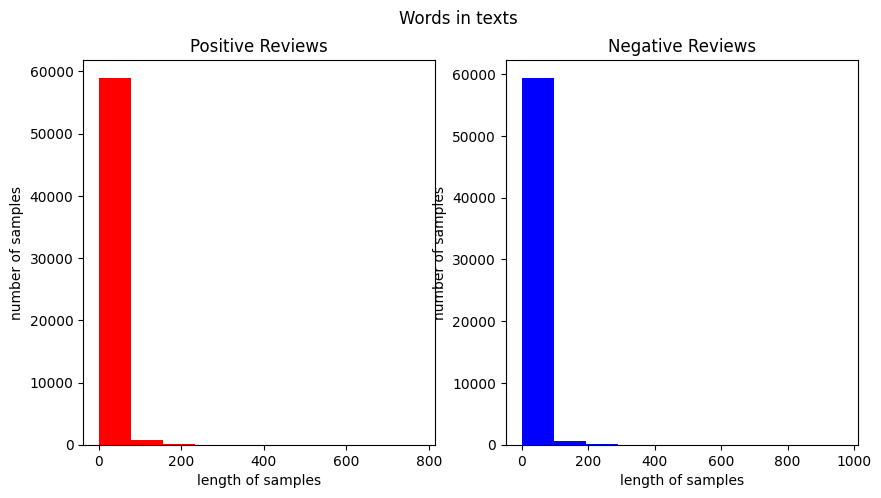

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['real_label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['real_label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [ ]:
X_train = train_data['tokenized'].values
y_train = train_data['real_label'].values
X_test= test_data['tokenized'].values
y_test = test_data['real_label'].values

### 7. 정수 인코딩

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 40270
등장 빈도가 1번 이하인 희귀 단어의 수: 15858
단어 집합에서 희귀 단어의 비율: 39.379190464365536
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.6954552451438077


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 24414


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[:3])

[[368, 470, 10, 198, 11, 81, 3625], [2633, 2, 120, 3365, 900, 82, 20, 1231, 148, 816, 140, 2161, 5, 160, 17, 773], [71, 7744, 3973, 122, 113, 237, 12, 4, 539, 2385, 15, 66, 429, 67, 1387, 6, 10, 237, 117, 5, 139, 5, 262, 5, 12421, 25, 5379, 3, 19, 421, 2634, 167, 44, 4127, 16, 46, 379, 63, 48, 2, 544, 26]]


### 8. 패딩
패딩: 서로 다른 길이의 샘플들의 길이를 동일하게 맞춰주는 작업

리뷰의 최대 길이 : 964
리뷰의 평균 길이 : 19.001941666666667


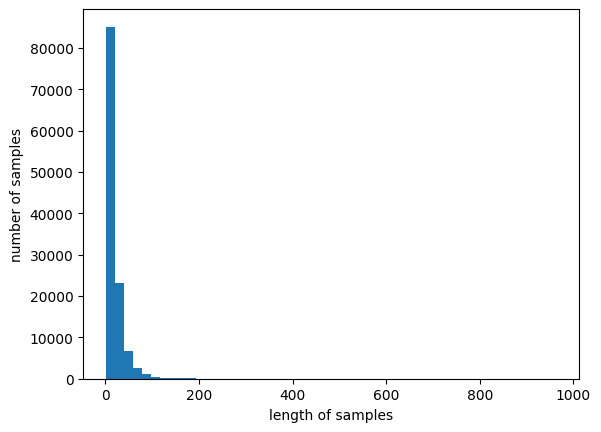

In [ ]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
max_len = 80
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 80 이하인 샘플의 비율: 98.18833333333333


In [ ]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

## 9. GRU로 감성 분류하기

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('GRU_mj_model_v4.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=32, validation_split=0.2)
# GRU_mj_model: batch_size=32, validation_split=0.2, big datset

loaded_model = load_model('GRU_mj_model_v4.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

Epoch 1/15
2997/3000 [============================>.] - ETA: 0s - loss: 0.3649 - acc: 0.8331
Epoch 1: val_acc improved from -inf to 0.85529, saving model to GRU_mj_model_v4.h5
3000/3000 [==============================] - 61s 18ms/step - loss: 0.3649 - acc: 0.8331 - val_loss: 0.3150 - val_acc: 0.8553
Epoch 2/15
2992/3000 [============================>.] - ETA: 0s - loss: 0.2899 - acc: 0.8716
Epoch 2: val_acc improved from 0.85529 to 0.86650, saving model to GRU_mj_model_v4.h5
3000/3000 [==============================] - 22s 7ms/step - loss: 0.2900 - acc: 0.8716 - val_loss: 0.2960 - val_acc: 0.8665
Epoch 3/15
2998/3000 [============================>.] - ETA: 0s - loss: 0.2643 - acc: 0.8852
Epoch 3: val_acc improved from 0.86650 to 0.86796, saving model to GRU_mj_model_v4.h5
3000/3000 [==============================] - 23s 8ms/step - loss: 0.2643 - acc: 0.8851 - val_loss: 0.2891 - val_acc: 0.8680
Epoch 4/15
2993/3000 [============================>.] - ETA: 0s - loss: 0.2430 - acc: 0.8975


# 모델 학습 다른 것들

In [ ]:
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=32, validation_split=0.2)
# GRU_mj_model: batch_size=32, validation_split=0.2, small datset

Epoch 1/15
1875/1875 [==============================] - ETA: 0s - loss: 0.3879 - acc: 0.8199
Epoch 1: val_acc improved from -inf to 0.84887, saving model to GRU_mj_model_v3.h5
1875/1875 [==============================] - 56s 26ms/step - loss: 0.3879 - acc: 0.8199 - val_loss: 0.3282 - val_acc: 0.8489
Epoch 2/15
1871/1875 [============================>.] - ETA: 0s - loss: 0.3001 - acc: 0.8682
Epoch 2: val_acc improved from 0.84887 to 0.85927, saving model to GRU_mj_model_v3.h5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3002 - acc: 0.8681 - val_loss: 0.3074 - val_acc: 0.8593
Epoch 3/15
1875/1875 [==============================] - ETA: 0s - loss: 0.2696 - acc: 0.8840
Epoch 3: val_acc improved from 0.85927 to 0.86240, saving model to GRU_mj_model_v3.h5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2696 - acc: 0.8840 - val_loss: 0.3049 - val_acc: 0.8624
Epoch 4/15
1874/1875 [============================>.] - ETA: 0s - loss: 0.2468 - acc: 0.8955


In [ ]:
loaded_model = load_model('GRU_mj_model_v3.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 3s 4ms/step - loss: 0.2988 - acc: 0.8644

 테스트 정확도: 0.8644


In [ ]:
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)
# GRU_mj_model: batch_size=64, validation_split=0.2

Epoch 1/15
1600/1600 [==============================] - ETA: 0s - loss: 0.3738 - acc: 0.8274
Epoch 1: val_acc improved from -inf to 0.85371, saving model to GRU_mj_model.h5
1600/1600 [==============================] - 60s 35ms/step - loss: 0.3738 - acc: 0.8274 - val_loss: 0.3186 - val_acc: 0.8537
Epoch 2/15
1597/1600 [============================>.] - ETA: 0s - loss: 0.2867 - acc: 0.8738
Epoch 2: val_acc improved from 0.85371 to 0.86828, saving model to GRU_mj_model.h5
1600/1600 [==============================] - 18s 11ms/step - loss: 0.2867 - acc: 0.8739 - val_loss: 0.2882 - val_acc: 0.8683
Epoch 3/15
1600/1600 [==============================] - ETA: 0s - loss: 0.2599 - acc: 0.8869
Epoch 3: val_acc improved from 0.86828 to 0.87121, saving model to GRU_mj_model.h5
1600/1600 [==============================] - 14s 9ms/step - loss: 0.2599 - acc: 0.8869 - val_loss: 0.2858 - val_acc: 0.8712
Epoch 4/15
1595/1600 [============================>.] - ETA: 0s - loss: 0.2407 - acc: 0.8978
Epoch 4:

In [ ]:
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=32, validation_split=0.1)
# GRU_mj_model_v2: batch_size=32, validation_split=0.1
# loss: 0.2843 - acc: 0.8720

Epoch 1/15
3599/3600 [============================>.] - ETA: 0s - loss: 0.3541 - acc: 0.8359
Epoch 1: val_acc improved from -inf to 0.86000, saving model to GRU_mj_model_v2.h5
3600/3600 [==============================] - 76s 19ms/step - loss: 0.3541 - acc: 0.8359 - val_loss: 0.3083 - val_acc: 0.8600
Epoch 2/15
3596/3600 [============================>.] - ETA: 0s - loss: 0.2851 - acc: 0.8732
Epoch 2: val_acc improved from 0.86000 to 0.86437, saving model to GRU_mj_model_v2.h5
3600/3600 [==============================] - 27s 7ms/step - loss: 0.2851 - acc: 0.8732 - val_loss: 0.2953 - val_acc: 0.8644
Epoch 3/15
3593/3600 [============================>.] - ETA: 0s - loss: 0.2602 - acc: 0.8871
Epoch 3: val_acc improved from 0.86437 to 0.87250, saving model to GRU_mj_model_v2.h5
3600/3600 [==============================] - 24s 7ms/step - loss: 0.2603 - acc: 0.8871 - val_loss: 0.2854 - val_acc: 0.8725
Epoch 4/15
3596/3600 [============================>.] - ETA: 0s - loss: 0.2385 - acc: 0.8990


In [ ]:
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=32, validation_split=0.2)
# batch_size=32, validation_split=0.2
# epoch 5: loss: 0.0272 - acc: 0.9908 - val_loss: 0.6898 - val_acc: 0.8622
#

Epoch 1/15
3198/3200 [============================>.] - ETA: 0s - loss: 0.0640 - acc: 0.9771
Epoch 1: val_acc did not improve from 0.86633
3200/3200 [==============================] - 25s 8ms/step - loss: 0.0641 - acc: 0.9770 - val_loss: 0.6035 - val_acc: 0.8405
Epoch 2/15
3197/3200 [============================>.] - ETA: 0s - loss: 0.0491 - acc: 0.9828
Epoch 2: val_acc did not improve from 0.86633
3200/3200 [==============================] - 23s 7ms/step - loss: 0.0491 - acc: 0.9828 - val_loss: 0.6634 - val_acc: 0.8398
Epoch 3/15
3197/3200 [============================>.] - ETA: 0s - loss: 0.0376 - acc: 0.9867
Epoch 3: val_acc did not improve from 0.86633
3200/3200 [==============================] - 25s 8ms/step - loss: 0.0376 - acc: 0.9867 - val_loss: 0.7776 - val_acc: 0.8330
Epoch 4/15
3194/3200 [============================>.] - ETA: 0s - loss: 0.0282 - acc: 0.9901
Epoch 4: val_acc did not improve from 0.86633
3200/3200 [==============================] - 25s 8ms/step - loss: 0.0282

In [ ]:
loaded_model = load_model('GRU_mj_model_v3.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

1000/1000 [==============================] - 3s 3ms/step - loss: 0.3048 - acc: 0.8684

 테스트 정확도: 0.8684


In [ ]:
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=16, validation_split=0.2)
# batch_size=16, validation_split=0.2

Epoch 1/15
6396/6400 [============================>.] - ETA: 0s - loss: 0.3590 - acc: 0.8348
Epoch 1: val_acc improved from -inf to 0.85414, saving model to GRU_mj_model_v3.h5
6400/6400 [==============================] - 72s 11ms/step - loss: 0.3590 - acc: 0.8348 - val_loss: 0.3153 - val_acc: 0.8541
Epoch 2/15
6399/6400 [============================>.] - ETA: 0s - loss: 0.2939 - acc: 0.8692
Epoch 2: val_acc improved from 0.85414 to 0.86477, saving model to GRU_mj_model_v3.h5
6400/6400 [==============================] - 49s 8ms/step - loss: 0.2940 - acc: 0.8692 - val_loss: 0.2974 - val_acc: 0.8648
Epoch 3/15
6393/6400 [============================>.] - ETA: 0s - loss: 0.2665 - acc: 0.8842
Epoch 3: val_acc improved from 0.86477 to 0.86625, saving model to GRU_mj_model_v3.h5
6400/6400 [==============================] - 45s 7ms/step - loss: 0.2665 - acc: 0.8842 - val_loss: 0.2966 - val_acc: 0.8662
Epoch 4/15
6396/6400 [============================>.] - ETA: 0s - loss: 0.2436 - acc: 0.8976


In [ ]:
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=48, validation_split=0.2)
# batch_size=48, validation_split=0.2

Epoch 1/15
2134/2134 [==============================] - ETA: 0s - loss: 0.0143 - acc: 0.9953
Epoch 1: val_acc did not improve from 0.86633
2134/2134 [==============================] - 33s 15ms/step - loss: 0.0143 - acc: 0.9953 - val_loss: 1.0223 - val_acc: 0.8317
Epoch 2/15
2130/2134 [============================>.] - ETA: 0s - loss: 0.0098 - acc: 0.9968
Epoch 2: val_acc did not improve from 0.86633
2134/2134 [==============================] - 19s 9ms/step - loss: 0.0098 - acc: 0.9968 - val_loss: 1.1438 - val_acc: 0.8305
Epoch 3/15
2134/2134 [==============================] - ETA: 0s - loss: 0.0078 - acc: 0.9977
Epoch 3: val_acc did not improve from 0.86633
2134/2134 [==============================] - 18s 8ms/step - loss: 0.0078 - acc: 0.9977 - val_loss: 1.2062 - val_acc: 0.8350
Epoch 4/15
2128/2134 [============================>.] - ETA: 0s - loss: 0.0062 - acc: 0.9981
Epoch 4: val_acc did not improve from 0.86633
2134/2134 [==============================] - 18s 8ms/step - loss: 0.006

In [ ]:
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=48, validation_split=0.1)
# batch_size=48, validation_split=0.1

Epoch 1/15
2397/2400 [============================>.] - ETA: 0s - loss: 0.0497 - acc: 0.9856
Epoch 1: val_acc did not improve from 0.86633
2400/2400 [==============================] - 19s 8ms/step - loss: 0.0497 - acc: 0.9856 - val_loss: 0.6303 - val_acc: 0.8413
Epoch 2/15
2396/2400 [============================>.] - ETA: 0s - loss: 0.0275 - acc: 0.9921
Epoch 2: val_acc did not improve from 0.86633
2400/2400 [==============================] - 17s 7ms/step - loss: 0.0275 - acc: 0.9921 - val_loss: 0.7332 - val_acc: 0.8344
Epoch 3/15
2397/2400 [============================>.] - ETA: 0s - loss: 0.0155 - acc: 0.9956
Epoch 3: val_acc did not improve from 0.86633
2400/2400 [==============================] - 18s 7ms/step - loss: 0.0155 - acc: 0.9956 - val_loss: 0.8569 - val_acc: 0.8382
Epoch 4/15
2396/2400 [============================>.] - ETA: 0s - loss: 0.0093 - acc: 0.9973
Epoch 4: val_acc did not improve from 0.86633
2400/2400 [==============================] - 19s 8ms/step - loss: 0.0093

In [ ]:
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)
# batch_size=48, validation_split=0.1

# 모델 저장

In [ ]:
import tensorflow as tf
#model.save('/content/drive/MyDrive/유튜브 도덕판단 연구용/GRU_mj_model_v4.h5')
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/유튜브 도덕판단 연구용/GRU_mj_model_v4.h5')
#loaded_model = tf.keras.models.load_model('/content/GRU_mj_model.h5')

In [ ]:
X_train

array([[    0,     0,     0, ...,    26,   812,   812],
       [    0,     0,     0, ...,   726,   648,  5024],
       [    0,     0,     0, ...,    73,   181, 11160],
       ...,
       [    0,     0,     0, ...,    99,    27,    33],
       [    0,     0,     0, ...,   514,   785,  2294],
       [    0,     0,     0, ...,   130,     2,     9]], dtype=int32)

# Explainable AI: LIME

In [ ]:
!pip install lime

In [ ]:
import lime
import lime.lime_text
import numpy as np

In [ ]:
import random
id = random.randrange(0,len(train_data["comment"]))
text_sample = train_data["comment"][id]
print(text_sample)

천사가 아주 가까이 있었네요


In [ ]:
def predict_proba(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', str(new_sentence))
  new_sentence = mecab.morphs(new_sentence)
  new_sentence = [word for word in new_sentence if not word in stopwords]
  encoded = tokenizer.texts_to_sequences([new_sentence])
  pad_new = pad_sequences(encoded, maxlen = 5000)
  score = loaded_model.predict(pad_new)
  returnable = []
  for i in score:
    temp = i[0]
    returnable.append(np.array([1-temp,temp]))

  return np.array(returnable)

In [ ]:
predict_proba(text_sample)

1/1 [==============================] - 0s 69ms/step


array([[0.00176549, 0.99823451]])

In [ ]:
type(text_sample)

str

In [ ]:
from lime.lime_text import LimeTextExplainer
class_names = ["부정","긍정"]
explainer = LimeTextExplainer(class_names=class_names,
                              verbose = True)

exp = explainer.explain_instance(text_sample,
                                 predict_proba,
                                 num_features = vocab_size,
                                 num_samples = 1)
# num_samples = 1

1/1 [==============================] - 0s 69ms/step
Intercept 0.9982345104217529
Prediction_local [0.99823451]
Right: 0.9982345104217529


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
exp.show_in_notebook(text=True,
                     predict_proba=True)

In [ ]:
exp.as_list()

[('천사가', 0.0), ('아주', 0.0), ('가까이', 0.0), ('있었네요', 0.0)]

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
c = make_pipeline(tokenizer, model)
class_names = ["negative", "positive"]
explainer = LimeTextExplainer(class_names = class_names)


NameError: ignored

In [ ]:
exp = explainer.explain_instance(text_sample,
                                 c.predict_proba,
                                 num_features = 10)

print("Question: \n", val_df["question_text"][idx])
print("Probability (Insincere) =", c.predict_proba([val_df["question_text"][idx]])[0, 1])
print("Probability (Sincere) =", c.predict_proba([val_df["question_text"][idx]])[0, 0])
print("True Class is:", class_names[val_df["target"][idx]])

# Explainable AI: SHAP

In [ ]:
!pip install shap

In [ ]:
import shap

In [ ]:
model

In [ ]:
loaded_model

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

TypeError: ignored

In [ ]:
import numpy as np

def find_missing_values(arr):
    # 누락된 값의 인덱스를 저장할 리스트
    missing_indices = []

    # 배열을 순회하면서 누락된 값의 인덱스를 찾음
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            if np.isnan(arr[i, j]):  # 누락된 값인 경우
                missing_indices.append((i, j))

    return missing_indices


In [ ]:
# 누락된 값의 인덱스 찾기
missing_indices = find_missing_values(X_train)

# 결과 출력
if len(missing_indices) > 0:
    print("누락된 값이 발견되었습니다.")
    for idx in missing_indices:
        print(f"인덱스 {idx}에 누락된 값이 있습니다.")
else:
    print("누락된 값이 없습니다.")

누락된 값이 없습니다.


In [ ]:
model.input_shape
# https://github.com/slundberg/shap/issues/1226

In [ ]:
import tensorflow as tf

In [ ]:
import shap

# we use the first 100 training examples as our background dataset to integrate over
explainer = shap.DeepExplainer(model, X_train[:100])

# explain the first 10 predictions
# explaining each prediction requires 2 * background dataset size runs
shap_values = explainer.shap_values(X_test[:10])

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


TypeError: ignored

In [ ]:
new_model_input = tf.keras.layers.Input(shape=(80,))
new_model_output = model(new_model_input)
new_model = tf.keras.models.Model(inputs=new_model_input, outputs=new_model_output)

In [ ]:
# we use the first 100 training examples as our background dataset to integrate over
explainer = shap.DeepExplainer(new_model, X_train[:100])

# explain the first 10 predictions
# explaining each prediction requires 2 * background dataset size runs
shap_values = explainer.shap_values(np.array(X_test[:10]))

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


AttributeError: ignored

# Example of SHAP

https://shap.readthedocs.io/en/latest/example_notebooks/text_examples/sentiment_analysis/Positive%20vs.%20Negative%20Sentiment%20Classification.html

In [ ]:
!pip install transformers

In [ ]:
!pip install datasets

In [ ]:
import transformers
import datasets
import shap
import numpy as np

dataset = datasets.load_dataset("imdb", split="test")

# shorten the strings to fit into the pipeline model
short_data = [v[:500] for v in dataset["text"][:20]]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb downloaded and prepared to /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0. Subsequent calls will reuse this data.


In [ ]:
classifier = transformers.pipeline('sentiment-analysis', return_all_scores=True)
classifier(short_data[:2])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


`return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


[[{'label': 'NEGATIVE', 'score': 0.07582056522369385},
  {'label': 'POSITIVE', 'score': 0.9241793751716614}],
 [{'label': 'NEGATIVE', 'score': 0.018342431634664536},
  {'label': 'POSITIVE', 'score': 0.9816576242446899}]]

In [ ]:
# define the explainer
explainer = shap.Explainer(classifier)

In [ ]:
# explain the predictions of the pipeline on the first two samples
shap_values = explainer(short_data[:2])

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 3it [02:51, 85.74s/it]


In [ ]:
shap.plots.text(shap_values[:,:,"POSITIVE"])

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


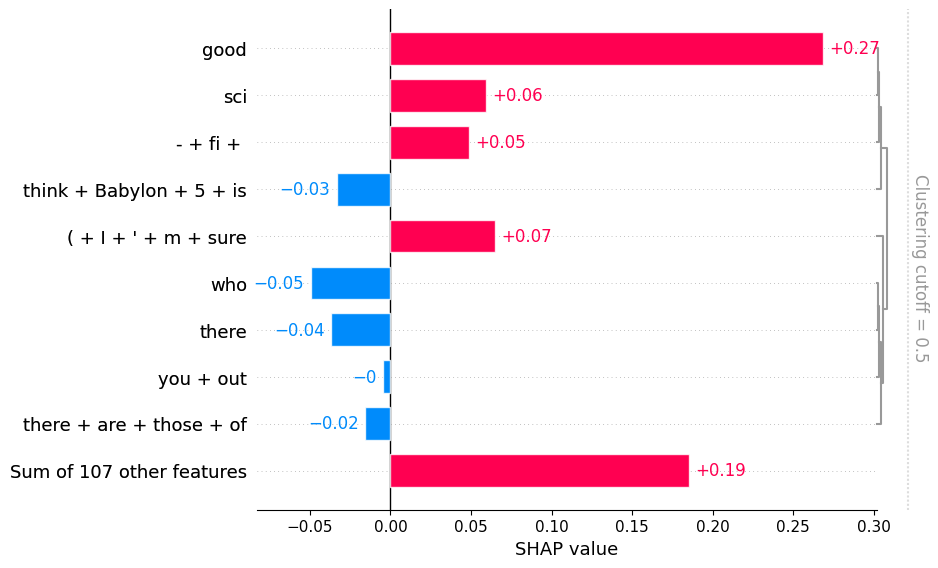

In [ ]:
shap.plots.bar(shap_values[0,:,"POSITIVE"])

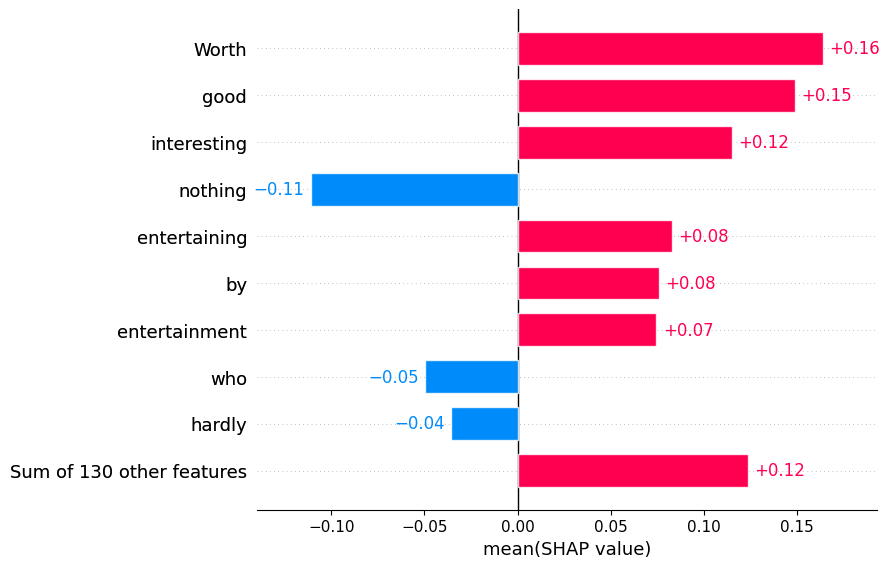

In [ ]:
shap.plots.bar(shap_values[:, :, "POSITIVE"].mean(0))

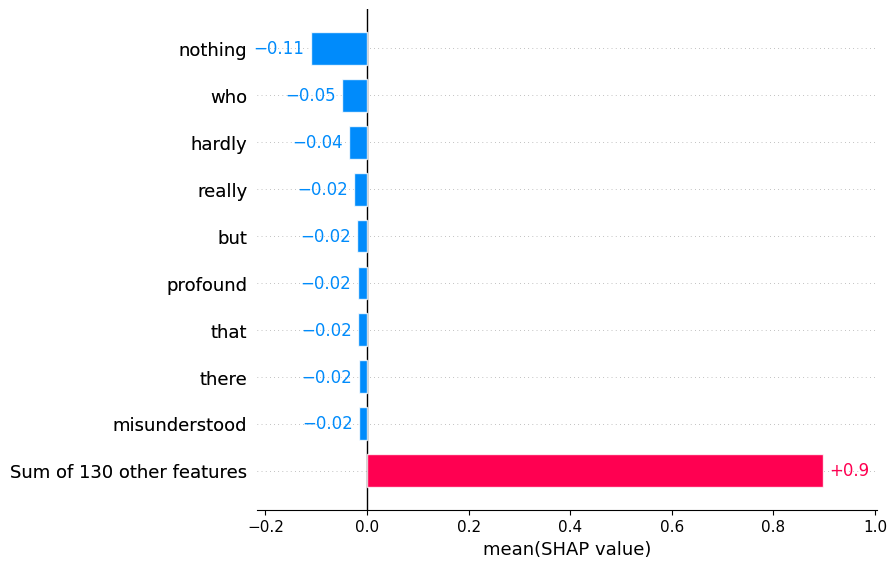

In [ ]:
shap.plots.bar(shap_values[:, :, "POSITIVE"].mean(0), order=shap.Explanation.argsort)

# 새 섹션

In [ ]:
# define the explainer
classifier = transformers.pipeline('sentiment-analysis', return_all_scores=True)
classifier(train_data[:2])

NameError: ignored

In [ ]:
explainer = shap.Explainer(classifier)

In [ ]:
np_X_train_static = np.asarray(X_train)
np_X_test_static = np.asarray(X_test)

In [ ]:
rng = np.random.default_rng()
shap_train_static = rng.choice(np_X_train_static, size=100, replace=False)
shap_test_static = rng.choice(np_X_test_static, size=100, replace=True)

In [ ]:
shap_test_static

array([[    0,     0,     0, ...,   140,    58,   787],
       [    0,     0,     0, ...,   975,    14, 24950],
       [    0,     0,     0, ...,  1870,    49,   697],
       ...,
       [    0,     0,     0, ...,    34,    57,   189],
       [    0,     0,     0, ...,   331,  3042,  2189],
       [    0,     0,     0, ...,   354,   229,  1577]], dtype=int32)

In [ ]:
DE = shap.DeepExplainer(loaded_model, [shap_train_static])

shap_values = DE.shap_values([shap_test_static],
                             check_additivity=False)

shaps.append(shap_values)

TypeError: ignored

In [ ]:
shap_values

NameError: ignored

In [ ]:
explainer = shap.DeepExplainer(loaded_model, X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

ResourceExhaustedError: ignored

In [ ]:
# Use the training data for deep explainer => can use fewer instances
explainer = shap.DeepExplainer(loaded_model, X_train)
# explain the the testing instances (can use fewer instanaces)
# explaining each prediction requires 2 * background dataset size runs
shap_values = explainer.shap_values(X_test)

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.


ResourceExhaustedError: ignored

In [ ]:
import shap

explainer = shap.Explainer(loaded_model,
                           X_train_sm,
                           feature_names=vectorizer.get_feature_names())

shap_values = explainer(X_test)

In [ ]:
shap.plots.beeswarm(shap_values,max_display=25)

# 나머지

In [ ]:
test_predict_model = loaded_model.predict(X_test)
test_predict_model

1250/1250 [==============================] - 4s 3ms/step


array([[0.3960243 ],
       [0.16346495],
       [0.03157726],
       ...,
       [0.1571008 ],
       [0.9997428 ],
       [0.9915964 ]], dtype=float32)

In [ ]:
len(test_predict_model)

40000

In [ ]:
train_predict_model = loaded_model.predict(X_train)
train_predict_model

3750/3750 [==============================] - 12s 3ms/step


array([[5.4093696e-02],
       [2.8792340e-01],
       [5.6364870e-04],
       ...,
       [9.0644026e-01],
       [8.4257239e-01],
       [9.9915171e-01]], dtype=float32)

In [ ]:
len(train_predict_model)

120000

In [ ]:
train_data_result = train_data[['comment', 'real_label','tokenized']]
train_data_result["predict_score_rnn"] = train_predict_model
train_data_result

<ipython-input-41-ffd0b5e1d1b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_result["predict_score_rnn"] = train_predict_model


,comment,real_label,tokenized,predict_score_rnn
0,형 딸도 문제가 많다던데,0,"[형, 딸, 도, 문제, 가, 많, 다던데]",0.054094
1,냥이 차칸척 인분 추가요 온데 가르치고다니네 별,0,"[냥, 이, 차, 칸, 척, 인, 분, 추가, 요, 온, 데, 가르치, 고, 다니,...",0.287923
2,너무 물러터진 대한민국 법 술에는 엄청 관대한 나라 이러니 외국인들도 술먹고 사고치...,0,"[너무, 물러, 터진, 대한민국, 법, 술, 에, 는, 엄청, 관대, 한, 나라, ...",0.000564
3,한심한 공무원들 이네요 완전 무방비상태네요 국민들은 누굴 믿어야하는지,0,"[한심, 한, 공무원, 들, 이, 네요, 완전, 무방비, 상태, 네요, 국민, 들,...",0.012491
4,이걸 어떻게 보이스피싱으로 생각하고 신고를하지 신기하네요 저였으면 그런생각을 아예못...,1,"[이걸, 어떻게, 보이스, 피싱, 으로, 생각, 하, 고, 신고, 를, 하, 지, ...",0.099618
...,...,...,...,...
119995,대한민국 만세 대단한 시민의식입니다 감동했습니다,1,"[대한민국, 만세, 대단, 한, 시민, 의식, 입니다, 감동, 했, 습니다]",0.999670
119996,드디어 올라가넼,1,"[드디어, 올라가, 넼]",0.515546
119997,나 눈물나와서 울었어요 마지막 할아버지 역주행으로 자전거 타고가시는데 자전거메모에 ...,1,"[나, 눈물, 나와서, 울, 었, 어요, 마지막, 할아버지, 역주행, 으로, 자전거...",0.906440
119998,난 생존수영 배웠지만 년만에 다 까먹어버렸음 저아이는 진짜 대단하다 왠만한 어린아이...,1,"[난, 생존, 수영, 배웠, 지만, 년, 만, 에, 다, 까먹, 어, 버렸, 음, ...",0.842572


In [ ]:
train_data_result["predict_label_rnn"] = train_data_result['predict_score_rnn'].apply(lambda x: 0 if x < 0.5 else 1)

<ipython-input-42-99d4de45446c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_result["predict_label_rnn"] = train_data_result['predict_score_rnn'].apply(lambda x: 0 if x < 0.5 else 1)


In [ ]:
train_data_result

,comment,real_label,tokenized,predict_score_rnn,predict_label_rnn
0,형 딸도 문제가 많다던데,0,"[형, 딸, 도, 문제, 가, 많, 다던데]",0.054094,0
1,냥이 차칸척 인분 추가요 온데 가르치고다니네 별,0,"[냥, 이, 차, 칸, 척, 인, 분, 추가, 요, 온, 데, 가르치, 고, 다니,...",0.287923,0
2,너무 물러터진 대한민국 법 술에는 엄청 관대한 나라 이러니 외국인들도 술먹고 사고치...,0,"[너무, 물러, 터진, 대한민국, 법, 술, 에, 는, 엄청, 관대, 한, 나라, ...",0.000564,0
3,한심한 공무원들 이네요 완전 무방비상태네요 국민들은 누굴 믿어야하는지,0,"[한심, 한, 공무원, 들, 이, 네요, 완전, 무방비, 상태, 네요, 국민, 들,...",0.012491,0
4,이걸 어떻게 보이스피싱으로 생각하고 신고를하지 신기하네요 저였으면 그런생각을 아예못...,1,"[이걸, 어떻게, 보이스, 피싱, 으로, 생각, 하, 고, 신고, 를, 하, 지, ...",0.099618,0
...,...,...,...,...,...
119995,대한민국 만세 대단한 시민의식입니다 감동했습니다,1,"[대한민국, 만세, 대단, 한, 시민, 의식, 입니다, 감동, 했, 습니다]",0.999670,1
119996,드디어 올라가넼,1,"[드디어, 올라가, 넼]",0.515546,1
119997,나 눈물나와서 울었어요 마지막 할아버지 역주행으로 자전거 타고가시는데 자전거메모에 ...,1,"[나, 눈물, 나와서, 울, 었, 어요, 마지막, 할아버지, 역주행, 으로, 자전거...",0.906440,1
119998,난 생존수영 배웠지만 년만에 다 까먹어버렸음 저아이는 진짜 대단하다 왠만한 어린아이...,1,"[난, 생존, 수영, 배웠, 지만, 년, 만, 에, 다, 까먹, 어, 버렸, 음, ...",0.842572,1


In [ ]:
test_data_result =  test_data[['comment', 'real_label','tokenized']]
test_data_result["predict_score_rnn"] = test_predict_model
test_data_result

<ipython-input-44-ef0277565d2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_result["predict_score_rnn"] = test_predict_model


,comment,real_label,tokenized,predict_score_rnn
0,저딴것들이 우리세금 냠냠하네,1,"[저딴, 것, 우리, 세금, 냠냠]",0.396024
1,요즘 대학교 에타보면 저런 애들이 너무많아서 겁이남 학벌주의에 심취하는건 새내기때에...,0,"[요즘, 대학교, 타, 보, 면, 저런, 애, 너무, 많, 아서, 겁, 남, 학벌주...",0.163465
2,자기 딸이 회사에서 밥 짓는다고 그러면 화낼 인간들이 직원에게는 저러고 있네 어휴 ...,0,"[자기, 딸, 회사, 에서, 밥, 짓, 는다고, 그러, 면, 화낼, 인간, 직원, ...",0.031577
3,테이저건 쏘고 묶어놔야지 승무원들 처벌해라 뭐하는거야,0,"[테이저, 건, 쏘, 묶, 어, 놔야, 승무원, 처벌, 해라, 뭐, 거, 야]",0.000332
4,네 사정이야 어찌되었든 과속하셨구요 공권력 사칭으로 간주 벌금 이빠이 되겠습니다 서...,1,"[사정, 야, 어찌, 되, 었, 든, 과속, 셨, 구요, 공권력, 사칭, 으로, 간...",0.892184
...,...,...,...,...
39995,저런데 한국이 중국을 도와줘야 되는가 절대 않되는거지 인권이 심각하다 북한이랑 다를...,0,"[저런데, 한국, 중국, 도와, 줘야, 되, 는가, 절대, 않, 되, 거, 인권, ...",0.025497
39996,이런분들은 영웅이십니다 국민영웅들입니다 이런분들은 표창을 줘야합니다 그런분들 앞으로...,1,"[이런, 분, 영웅, 십니다, 국민, 영웅, 입니다, 이런, 분, 표창, 줘야, 합...",0.999416
39997,정신병있네 똑똑한척,0,"[정신병, 있, 똑똑, 척]",0.157101
39998,훌륭한 젊은이 아직 대한민국은 그대와같은 젊은이가 있는한 최고가 될수있다 젊은 영웅...,1,"[훌륭, 젊은이, 아직, 대한민국, 그대, 같, 젊은이, 있, 최고, 될, 수, 있...",0.999743


In [ ]:
test_data_result["predict_label_rnn"] = test_data_result['predict_score_rnn'].apply(lambda x: 0 if x < 0.5 else 1)

<ipython-input-45-48091d140410>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_result["predict_label_rnn"] = test_data_result['predict_score_rnn'].apply(lambda x: 0 if x < 0.5 else 1)


In [ ]:
test_data_result

,comment,real_label,tokenized,predict_score_rnn,predict_label_rnn
0,저딴것들이 우리세금 냠냠하네,1,"[저딴, 것, 우리, 세금, 냠냠]",0.396024,0
1,요즘 대학교 에타보면 저런 애들이 너무많아서 겁이남 학벌주의에 심취하는건 새내기때에...,0,"[요즘, 대학교, 타, 보, 면, 저런, 애, 너무, 많, 아서, 겁, 남, 학벌주...",0.163465,0
2,자기 딸이 회사에서 밥 짓는다고 그러면 화낼 인간들이 직원에게는 저러고 있네 어휴 ...,0,"[자기, 딸, 회사, 에서, 밥, 짓, 는다고, 그러, 면, 화낼, 인간, 직원, ...",0.031577,0
3,테이저건 쏘고 묶어놔야지 승무원들 처벌해라 뭐하는거야,0,"[테이저, 건, 쏘, 묶, 어, 놔야, 승무원, 처벌, 해라, 뭐, 거, 야]",0.000332,0
4,네 사정이야 어찌되었든 과속하셨구요 공권력 사칭으로 간주 벌금 이빠이 되겠습니다 서...,1,"[사정, 야, 어찌, 되, 었, 든, 과속, 셨, 구요, 공권력, 사칭, 으로, 간...",0.892184,1
...,...,...,...,...,...
39995,저런데 한국이 중국을 도와줘야 되는가 절대 않되는거지 인권이 심각하다 북한이랑 다를...,0,"[저런데, 한국, 중국, 도와, 줘야, 되, 는가, 절대, 않, 되, 거, 인권, ...",0.025497,0
39996,이런분들은 영웅이십니다 국민영웅들입니다 이런분들은 표창을 줘야합니다 그런분들 앞으로...,1,"[이런, 분, 영웅, 십니다, 국민, 영웅, 입니다, 이런, 분, 표창, 줘야, 합...",0.999416,1
39997,정신병있네 똑똑한척,0,"[정신병, 있, 똑똑, 척]",0.157101,0
39998,훌륭한 젊은이 아직 대한민국은 그대와같은 젊은이가 있는한 최고가 될수있다 젊은 영웅...,1,"[훌륭, 젊은이, 아직, 대한민국, 그대, 같, 젊은이, 있, 최고, 될, 수, 있...",0.999743,1


In [ ]:
train_data_result.to_excel("/content/drive/MyDrive/RNN_predict_train_revised.xlsx")
test_data_result.to_excel("/content/drive/MyDrive/RNN_predict_test_revised.xlsx")

## 리뷰 예측해보기

In [ ]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = mecab.morphs(new_sentence)
  new_sentence = [word for word in new_sentence if not word in stopwords]
  encoded = tokenizer.texts_to_sequences([new_sentence])
  pad_new = pad_sequences(encoded, maxlen = max_len)

  score = round(float(loaded_model.predict(pad_new)),4)
  return score

In [ ]:
sentiment_predict('이 상품 진짜 좋아요... 저는 강추합니다. 대박')

1/1 [==============================] - 0s 21ms/step


0.9959

In [ ]:
sentiment_predict('존나 기쁜 사건이네 죽을 놈은 죽어야지')

1/1 [==============================] - 0s 25ms/step


0.0501

In [ ]:
sentiment_predict('부자지간 정말멋지네요 아들도 형사님 해야살것같네요')

1/1 [==============================] - 0s 22ms/step


0.9999

In [ ]:
sentiment_predict('자기 잘못도 인정하지 않으면서 무슨 남들의 죄를 들어준다고 왜 감싸고도는지 다른 천주교인들까지 망신당하게 하지말고 죄를 인정하고 값을 치루세요')

1/1 [==============================] - 0s 20ms/step


0.0048

# 유튜브 댓글에 넣어보자


In [ ]:
import pandas as pd

#practice_ver_trainset = pd.read_excel("/content/drive/MyDrive/유튜브 도덕판단 연구용/revised_com_rest.xlsx")
practice_ver_trainset = pd.read_excel("/content/revised_com_rest.xlsx")

practice_ver_trainset

FileNotFoundError: ignored

In [ ]:
practice_ver_trainset_60000 = practice_ver_trainset[120000 + 9460 + 30000:]
practice_ver_trainset_60000 = practice_ver_trainset_60000.reset_index(drop=True)

practice_ver_trainset_60000

,comment,length_x,sentiments_gru,binary_sentiment_x,sentiment_rating5
0,도와와주신 시민들과 경찰관님 모두 위대한 국민입니다,28,0.986542,1,5
1,따뜻한 이웃이 있어 다행입니다 감사합니다 경찰분께도 감사드려요,34,0.968935,1,5
2,우리나라는 이런 분이 있어 참 좋은 것 같습니다,26,0.869872,1,5
3,정말 현장에 계셨던 모든 분들이 진정한 어벤져스 이고 히어로십니다,36,0.640971,1,4
4,역시 우리나라에는 나쁜사람보다 좋은사람이더많네요 이나라에사는 한사람이란게 자랑스럽습니다,48,0.882569,1,5
...,...,...,...,...,...
13259,극한직업 취제진 힘내세요,13,0.802741,1,5
13260,어뢰 연습표적으로 딱이다,13,0.941706,1,5
13261,교도소 죄수들은 무상으로 최고의 식단으로 국민 세금으로 잘 먹여주는 마당에 군인들 ...,88,0.959045,0,5
13262,너 먹고살자고 다른 사람 죽이겠다고,19,0.566192,1,3


In [ ]:
sentiments = []

for i in range(len(practice_ver_trainset_60000['comment'])):
  sent = sentiment_predict(practice_ver_trainset_60000['comment'][i])
  sentiments.append(sent)

sentiments
# 31868개 하는데 57분

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 37ms/step


[0.876194953918457,
 0.850791335105896,
 0.9382320642471313,
 0.7714267373085022,
 0.9892057180404663,
 0.8428559303283691,
 0.8464121222496033,
 0.9408803582191467,
 0.8226453065872192,
 0.9310513734817505,
 0.965293288230896,
 0.10698945075273514,
 0.9175898432731628,
 0.6801339983940125,
 0.448446124792099,
 0.2095154970884323,
 0.7065558433532715,
 0.9174233675003052,
 0.7928208708763123,
 0.24418532848358154,
 0.12465561926364899,
 0.9234746098518372,
 0.16591040790081024,
 0.017157528549432755,
 0.26419544219970703,
 0.7239110469818115,
 0.5706260204315186,
 0.9196584820747375,
 0.037591077387332916,
 0.10336229205131531,
 0.8760481476783752,
 0.024189040064811707,
 0.9665015339851379,
 0.8161474466323853,
 0.06984750181436539,
 0.06825856864452362,
 0.9407913088798523,
 0.907299280166626,
 0.3606412708759308,
 0.03400474041700363,
 0.16924084722995758,
 0.3316996693611145,
 0.19403713941574097,
 0.9664291739463806,
 0.9811146855354309,
 0.03250754624605179,
 0.0724223181605339,


In [ ]:
len(sentiments)

13264

In [ ]:
practice_ver_trainset_60000['sentiments'] = sentiments

In [ ]:
practice_ver_trainset_60000.to_excel("/content/revised_com_rest_159_end.xlsx", index = False)

In [ ]:
practice_ver_trainset_60000.to_excel("/content/drive/MyDrive/유튜브 도덕판단 연구용/revised_com_rest_129_159.xlsx", index = False)


In [ ]:
practice_ver_trainset_60000 = practice_ver_trainset[120000:150000]

practice_ver_trainset_60000

In [ ]:
practice_ver_trainset_60000 = practice_ver_trainset[120000:120000 + len(sentiments)] # 9460

In [ ]:
practice_ver_trainset_60000['sentiments'] = sentiments

<ipython-input-45-3410f7d73e23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  practice_ver_trainset_60000['sentiments'] = sentiments


In [ ]:
practice_ver_trainset.to_excel("/content/sample_data/to_others_2_sentiments.xlsx", index = False)

In [ ]:
from5to68132 = pd.DataFrame(practice_ver_trainset['comment'][:len(sentiments)])
from5to68132['sentiments'] = sentiments

In [ ]:
from5to68132

,comment,sentiments
0,굴삭기에 구조되는 사진보는데 찡하다 진짜 저 가족분들 얼마나 고마우셨을까,0.123601
1,멋진 분이시고 용감하시내,0.393462
2,하 눈물밖에안나와,0.032231
3,촛불 말고 수유등 있는데 그거사서 하지 큰일날뻔 했네,0.222782
4,아휴 눈물이 펑펑 이네요,0.348702
...,...,...
18127,고맙습니다 감사합니다 너무많이 고생많으셨어요,0.710594
18128,진짜 진영웅들 이런시민들 정말있서 다행요 그래도 이환자분다행이네요,0.861978
18129,운전자 눈까리 어디다 두고 다니냐 확마,0.301116
18130,난 이런 영상 너무조아 모두 감사합니다 복받으십시요,0.973719


In [ ]:
from5to68132.to_excel("/content/from5to68132.xlsx", index = False)

In [ ]:
emotion_comments = pd.read_excel("/content/df_all_less_filt_emotion.xlsx")

emotions = []

for i in range(len(emotion_comments['comment'])):
  emotion = sentiment_predict(emotion_comments['comment'][i])
  emotions.append(emotion)



In [ ]:
emotion_comments['emotion'] = emotions
emotion_comments.to_excel("/content/ytb_senti_and_emo.xlsx", index = False)

In [ ]:
emotion_comments

,Unnamed: 0.1,Unnamed: 0,comment,sentiment,sentiment_rating,p,v,emotion
0,0,1,경기도에 살았던 사람인데 저기서 핸드폰을 샀지만 144만원 짜리가 정품인데 어떤거는...,Negative,1.71,o,o,0.001034
1,1,2,글치 외?엡까는데 통장비밀번호가 필요해요? 사기치려고 작정을 햇구먼 저도 휴폰 방탄...,Negative,1.29,o,o,0.026087
2,2,3,미친것들 아니냐. 깜빵넣어라,Negative,1.10,o,o,0.076052
3,3,4,진짜 남의 피같은 돈을...,Negative,1.23,o,o,0.058061
4,4,5,나중에 니자녀가 벌받는다 평생 되는일 없을 것이다!,Negative,1.18,o,o,0.169074
...,...,...,...,...,...,...,...,...
9395,9395,9396,그동안 안 잡았던거죠. 더 깜짝 놀랄얘기 해드릴까요? 보이스피싱 사기는 대한민국에만...,Negative,1.25,x,x,0.013229
9396,9396,9397,얼굴 공개하자,Negative,2.13,x,x,0.156997
9397,9397,9398,해외에서 해당 국가 기관에서 범죄행위로 구속되는 애들 제발 한국 가서 재판 받게 해...,Negative,3.23,x,x,0.327421
9398,9398,9399,그런데 얼마나 맹하면 보이스 피싱을 당하는거지??,Negative,4.09,x,x,0.247431


In [ ]:
senti_17720 = pd.DataFrame(sentiments)
senti_17720
senti_17720.to_excel("/content/senti_after_17720.xlsx", index = False)